In [1]:
import pandas as pd

In [2]:
%matplotlib inline

Download the data from the book, unzip and put it in the data folder.

https://aqs.epa.gov/aqsweb/airdata/download_files.html#Raw

In [3]:
!wget -nc https://aqs.epa.gov/aqsweb/airdata/hourly_44201_2014.zip -O ../data/hourly_44201_2014.zip
!unzip -u ../data/hourly_44201_2014.zip -d ../data/

File ‘../data/hourly_44201_2014.zip’ already there; not retrieving.
Archive:  ../data/hourly_44201_2014.zip


## Read in your data

In [4]:
ozone = pd.read_csv('../data/hourly_44201_2014.csv',  
                    parse_dates={'Date_Time_Local': [9,10],
                                 'Date_Time_GMT':[11,12],
                                 'Date_of_Last_Change': [23]}, 
                    dtype={'State Code': 'category',
                           'County Code': 'category',                           
                           'Site Num': 'category',
                           'Parameter Code': 'category',
                           'Datum': 'category',
                           'Parameter Name': 'category',
                           'Units of Measure': 'category',
                           'Qualifier': 'category',                           
                           'Method Type': 'category',
                           'Method Code': 'category',
                           'Method Name': 'category',                           
                           'State Name': 'category',                           
                           'County Name': 'category'})

In [5]:
ozone.rename(columns=lambda x: x.strip(" ").replace(' ', '_'), inplace=True)

In [6]:
ozone.dtypes

Date_Time_Local        datetime64[ns]
Date_Time_GMT          datetime64[ns]
Date_of_Last_Change    datetime64[ns]
State_Code                   category
County_Code                  category
Site_Num                     category
Parameter_Code               category
POC                             int64
Latitude                      float64
Longitude                     float64
Datum                        category
Parameter_Name               category
Sample_Measurement            float64
Units_of_Measure             category
MDL                           float64
Uncertainty                   float64
Qualifier                    category
Method_Type                  category
Method_Code                  category
Method_Name                  category
State_Name                   category
County_Name                  category
dtype: object

## Check the Packaging

In [7]:
ozone.shape

(9060694, 22)

Number of rows

In [8]:
len(ozone.index)

9060694

Number of cols

In [9]:
len(ozone.columns)

22

Note this is differen't from the book. What has gone on here?

In [10]:
ozone.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date_Time_Local,9060694,NaN,NaN,NaN,2014-07-04 17:33:19.858597632,2014-01-01 00:00:00,2014-04-20 12:00:00,2014-07-05 15:00:00,2014-09-19 19:00:00,2014-12-31 23:00:00,NaN
Date_Time_GMT,9060694,NaN,NaN,NaN,2014-07-04 23:43:30.273693184,2014-01-01 04:00:00,2014-04-20 18:00:00,2014-07-05 21:00:00,2014-09-20 01:00:00,2015-01-01 09:00:00,NaN
Date_of_Last_Change,9060694,NaN,NaN,NaN,2014-10-26 03:30:02.496363520,2014-02-03 00:00:00,2014-07-28 00:00:00,2014-10-16 00:00:00,2014-12-30 00:00:00,2019-03-12 00:00:00,NaN
State_Code,9060694,53,06,1393902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County_Code,9060694,138,013,411359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Site_Num,9060694,266,0002,531331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parameter_Code,9060694,1,44201,9060694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POC,9060694.0,NaN,NaN,NaN,1.070256,1.0,1.0,1.0,1.0,6.0,0.327655
Latitude,9060694.0,NaN,NaN,NaN,37.437158,18.177939,33.918137,38.013333,40.922,64.84569,5.048622
Longitude,9060694.0,NaN,NaN,NaN,-95.349292,-158.088613,-109.906796,-92.006318,-81.972222,-65.915482,16.323809


In [11]:
ozone.sample(5).T

,2163993,8539047,3805895,461531,1955869
Date_Time_Local,2014-12-02 13:00:00,2014-01-19 01:00:00,2014-04-21 02:00:00,2014-07-10 03:00:00,2014-09-30 17:00:00
Date_Time_GMT,2014-12-02 20:00:00,2014-01-19 09:00:00,2014-04-21 07:00:00,2014-07-10 10:00:00,2014-10-01 01:00:00
Date_of_Last_Change,2015-01-28 00:00:00,2014-04-16 00:00:00,2014-06-26 00:00:00,2014-11-05 00:00:00,2014-11-07 00:00:00
State_Code,08,53,21,04,06
County_Code,067,033,019,019,111
Site_Num,7001,0080,0017,1034,2002
Parameter_Code,44201,44201,44201,44201,44201
POC,1,1,1,1,1
Latitude,37.13678,47.568236,38.45934,32.38082,34.276316
Longitude,-107.62863,-122.308628,-82.64041,-111.12716,-118.683685


## Look at the Top and the Bottom of your Data

In [12]:
ozone.iloc[:,[8,9,0]].head()

,Latitude,Longitude,Date_Time_Local
0,30.497478,-87.880258,2014-03-01 01:00:00
1,30.497478,-87.880258,2014-03-01 02:00:00
2,30.497478,-87.880258,2014-03-01 03:00:00
3,30.497478,-87.880258,2014-03-01 04:00:00
4,30.497478,-87.880258,2014-03-01 05:00:00


In [13]:
ozone.iloc[:,[8,9,0]].tail()

,Latitude,Longitude,Date_Time_Local
9060689,31.7122,-106.3953,2014-08-31 19:00:00
9060690,31.7122,-106.3953,2014-08-31 20:00:00
9060691,31.7122,-106.3953,2014-08-31 21:00:00
9060692,31.7122,-106.3953,2014-08-31 22:00:00
9060693,31.7122,-106.3953,2014-08-31 23:00:00


## ABC: Always be Checking Your “n”s

In [14]:
ozone.Date_Time_Local.dt.time.head(24)

0     01:00:00
1     02:00:00
2     03:00:00
3     04:00:00
4     05:00:00
5     06:00:00
6     07:00:00
7     08:00:00
8     09:00:00
9     10:00:00
10    11:00:00
11    12:00:00
12    13:00:00
13    14:00:00
14    15:00:00
15    16:00:00
16    17:00:00
17    18:00:00
18    19:00:00
19    20:00:00
20    21:00:00
21    22:00:00
22    23:00:00
23    01:00:00
Name: Date_Time_Local, dtype: object

In [15]:
ozone.Date_Time_Local.dt.time.unique()

array([datetime.time(1, 0), datetime.time(2, 0), datetime.time(3, 0),
       datetime.time(4, 0), datetime.time(5, 0), datetime.time(6, 0),
       datetime.time(7, 0), datetime.time(8, 0), datetime.time(9, 0),
       datetime.time(10, 0), datetime.time(11, 0), datetime.time(12, 0),
       datetime.time(13, 0), datetime.time(14, 0), datetime.time(15, 0),
       datetime.time(16, 0), datetime.time(17, 0), datetime.time(18, 0),
       datetime.time(19, 0), datetime.time(20, 0), datetime.time(21, 0),
       datetime.time(22, 0), datetime.time(23, 0), datetime.time(0, 0)],
      dtype=object)

Seems like the problem from the textbook with the funny hours:minutes has been cleaned up in the dataset.

In [16]:
ozone.loc[(ozone.State_Code=='36') & 
          (ozone.County_Code=='033') &
          (ozone.Date_Time_Local >= '2014-09-30') & 
          (ozone.Date_Time_Local < '2014-10-01'),
          ['Date_Time_Local', 'Sample_Measurement']]

,Date_Time_Local,Sample_Measurement
5738169,2014-09-30 00:00:00,0.011
5738170,2014-09-30 01:00:00,0.012
5738171,2014-09-30 02:00:00,0.012
5738172,2014-09-30 03:00:00,0.011
5738173,2014-09-30 04:00:00,0.011
5738174,2014-09-30 05:00:00,0.011
5738175,2014-09-30 06:00:00,0.010
5738176,2014-09-30 07:00:00,0.010
5738177,2014-09-30 08:00:00,0.010
5738178,2014-09-30 09:00:00,0.010


In [17]:
len(ozone.State_Name.unique())

53

In [18]:
pd.Series(ozone.State_Name.cat.categories)

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District Of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

## Validate With at Least One External Data Source

In [19]:
ozone.Sample_Measurement.describe()

count    9.060694e+06
mean     3.027292e-02
std      1.550847e-02
min     -5.000000e-03
25%      1.900000e-02
50%      3.000000e-02
75%      4.100000e-02
max      2.130000e-01
Name: Sample_Measurement, dtype: float64

In [20]:
ozone.Sample_Measurement.quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

0.0   -0.005
0.1    0.009
0.2    0.016
0.3    0.022
0.4    0.026
0.5    0.030
0.6    0.035
0.7    0.039
0.8    0.043
0.9    0.050
1.0    0.213
Name: Sample_Measurement, dtype: float64

## Make a Plot

In [21]:
import seaborn as sns

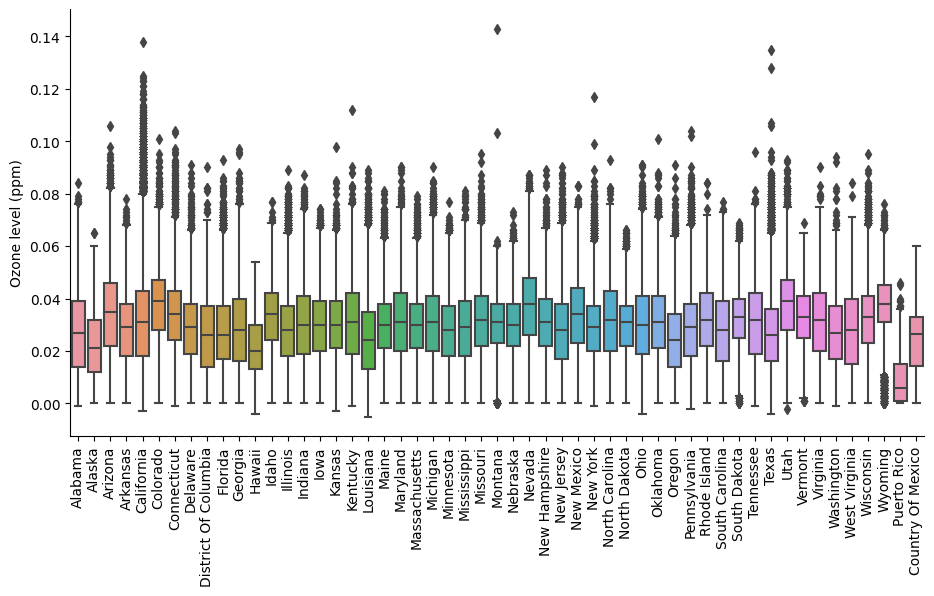

In [22]:
g = sns.catplot(data=ozone.sample(1000000), x='State_Name', y='Sample_Measurement', kind='box', aspect=2.0)
g.set_axis_labels("", "Ozone level (ppm)")
g.set_xticklabels(rotation=90);

## Try the Easy Solution First

In [23]:
ozone['Region'] = ozone.Longitude.map(lambda x: 'west' if x < -100 else 'east')

In [24]:
ozone.groupby(by='Region').Sample_Measurement.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
east,5815616.0,0.028757,0.014731,-0.005,0.018,0.029,0.039,0.135
west,3245078.0,0.032989,0.016467,-0.004,0.022,0.034,0.044,0.213


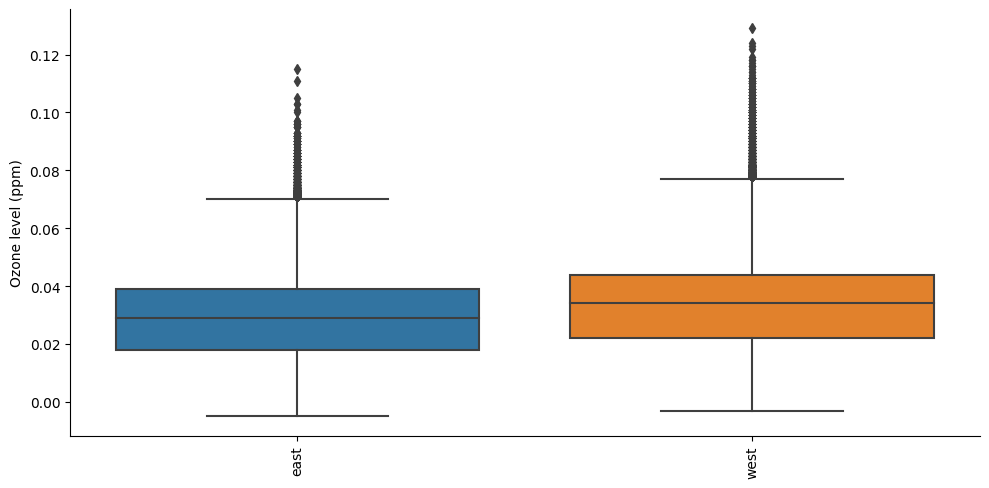

In [25]:
g = sns.catplot(data=ozone.sample(1000000), x='Region', y='Sample_Measurement', kind='box', aspect=2.0)
g.set_axis_labels("", "Ozone level (ppm)")
g.set_xticklabels(rotation=90);

## Challenge Your Solution

In [26]:
ozone.loc[~ozone.State_Name.isin(['Puerto Rico'])].groupby(by='Region').Sample_Measurement.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
east,5796604.0,0.028822,0.014702,-0.005,0.018,0.029,0.039,0.135
west,3245078.0,0.032989,0.016467,-0.004,0.022,0.034,0.044,0.213
